In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [27]:
# PDE u_t = u_xx + f
# domain 0 <= x <= L
# discretized into n equidistant intervals, step size h
L = 2
n = 80
x = linspace(0,L,n+1)
h = x[1]-x[0]
print('h = %6.4f' % h)
# time interval 0 <= t <= T
# discretized into time steps of length tau
T = 1
tau = 0.0004
m = int(T/tau)
t = linspace(tau,T,m)
# grid ratio
gam = tau/(h**2)
print('gamma = %6.4f' % gam)

h = 0.0250
gamma = 0.6400


In [28]:
# initial condition
def u0(x):
    return zeros_like(x)

# source term
def f(t,x):
    return (1+pi*pi*t)*sin(pi*x) 

# solution: u(t,x) = t * sin(pi*x)
def u_true(t,x):
    return t*sin(pi*x)

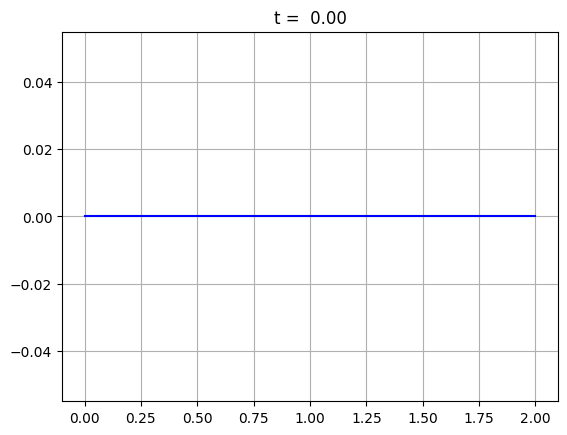

In [29]:
# Plot initial condition
u = u0(x)
unew = zeros_like(u)
plt.plot(x,u, 'b-')
plt.title('t = %5.2f' % 0)
plt.grid()
plt.show()

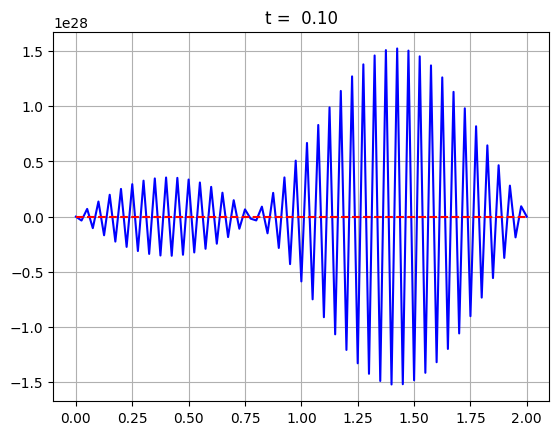

Time t= 0.10  rel.Error=152438851824780831646956912640.0000


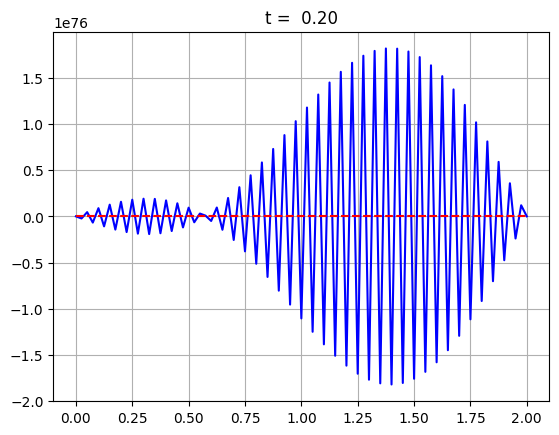

Time t= 0.20  rel.Error=90999229983367056378725324716921074895100356376638989337424367392402375180288.0000


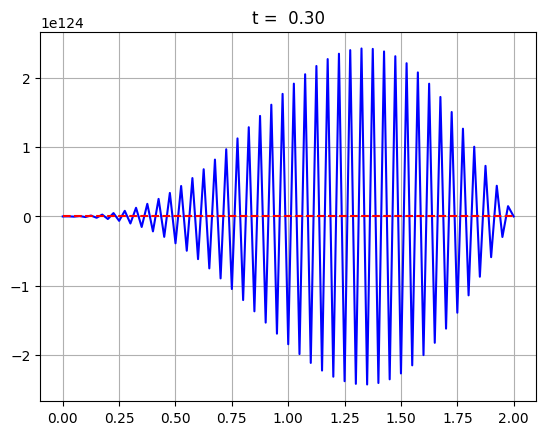

Time t= 0.30  rel.Error=80848219666132498987185106336006454550589882858418701672583436952878613355470159379503813115818163700829840446319147442241536.0000


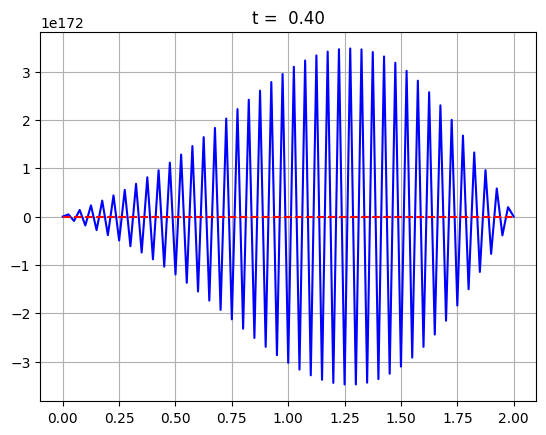

Time t= 0.40  rel.Error=86957402310525856622782839663905435543556698091488679216810795223606293965117568563038865430454190368853632001417735505760609437105002786755328664889463926816157985258078208.0000


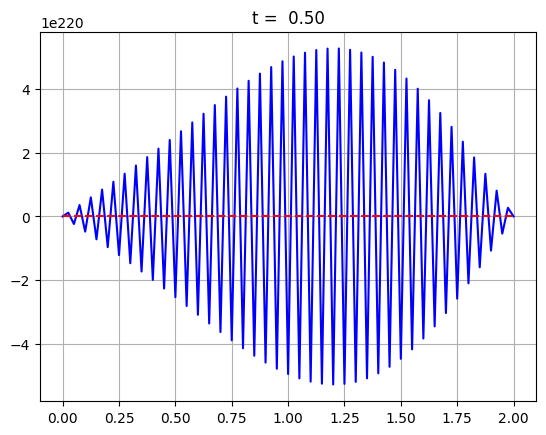

Time t= 0.50  rel.Error=105455615653236855753655438401613456713036438095016200852667221956391859210605302373357517663653511836321553963658731766617499283976681152190020441741226676845939275060246013637989559282135901360496214138802895105619394560.0000


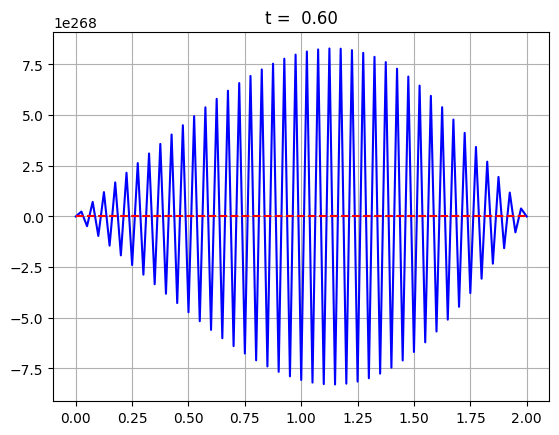

Time t= 0.60  rel.Error=138205429404855167341446226064142994589888336053942870412269802432304337614624578695217697363960272326075379321470255589508128766178202469361135920779991657675489580410211853594637790421156378423334894790023472994879857090532060793134397734817536168958464280787094077440.0000


/tmp/ipykernel_621466/4218234353.py:3: RuntimeWarning: overflow encountered in add
  unew[1:-1] = u[1:-1] + gam*(u[0:-2]-2*u[1:-1]+u[2:]) + tau*f(tt,x[1:-1])
/tmp/ipykernel_621466/4218234353.py:3: RuntimeWarning: overflow encountered in subtract
  unew[1:-1] = u[1:-1] + gam*(u[0:-2]-2*u[1:-1]+u[2:]) + tau*f(tt,x[1:-1])
/tmp/ipykernel_621466/4218234353.py:3: RuntimeWarning: invalid value encountered in add
  unew[1:-1] = u[1:-1] + gam*(u[0:-2]-2*u[1:-1]+u[2:]) + tau*f(tt,x[1:-1])


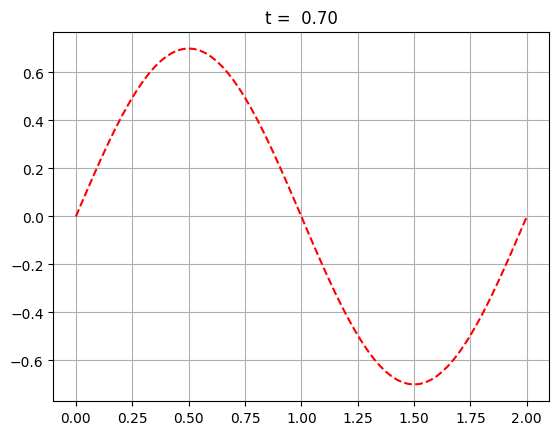

Time t= 0.70  rel.Error=     nan


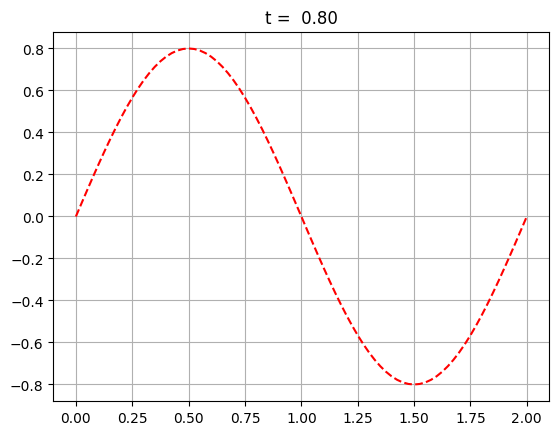

Time t= 0.80  rel.Error=     nan


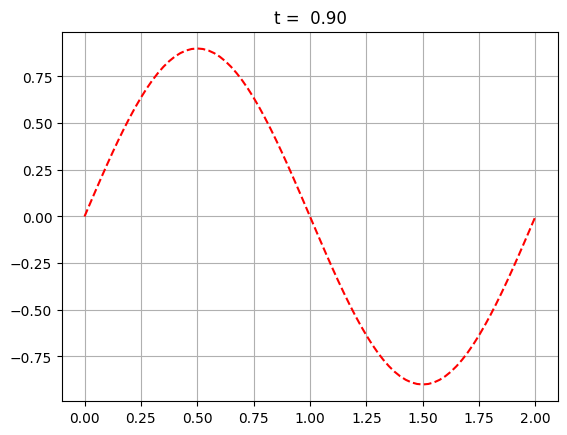

Time t= 0.90  rel.Error=     nan


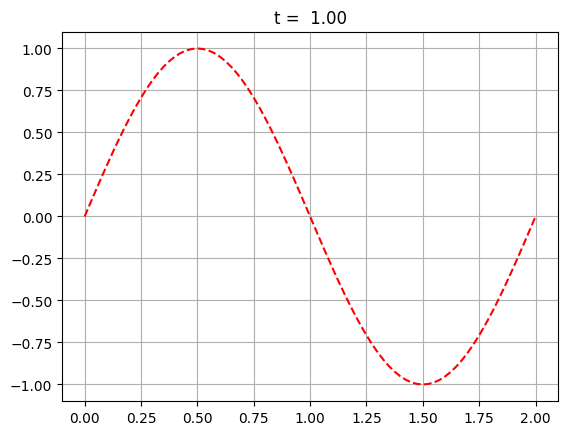

Time t= 1.00  rel.Error=     nan


In [30]:
# explicit scheme
for tt in t:
    unew[1:-1] = u[1:-1] + gam*(u[0:-2]-2*u[1:-1]+u[2:]) + tau*f(tt,x[1:-1])
    # Dirichlet boundary conditions
    unew[0] = 0.0
    unew[-1] = 0.0
    u = unew.copy()
    
    # Plot new solution
    if isclose(abs(10*tt-around(10*tt)),0):
        plt.plot(x,u, 'b-', x, u_true(tt,x), 'r--')
        plt.title('t = %5.2f' % tt)
        plt.grid()
        plt.show()
        print('Time t=%5.2f  rel.Error=%8.4f' %(tt, amax(abs(u-u_true(tt,x)))/amax(abs(u_true(tt,x)))))